KNN FROM SCRATCH: This is a step by step approach to getting a KNN Class:

Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
import statistics as st
from collections import Counter

Step 2: Importing a random dataset (Hers, IRIS) and splitting

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Step 3: Exploring the data

In [3]:
print(X.shape)
print(X_train.shape)
print(y.shape)
print(y_train.shape)

print(X_train[0])
print(y_train)

(150, 4)
(120, 4)
(150,)
(120,)
[5.1 2.5 3.  1.1]
[1 2 0 2 1 0 0 0 0 1 0 1 0 2 2 0 2 2 2 2 0 2 2 1 1 1 1 1 1 0 0 2 2 2 0 0 0
 2 1 2 2 1 0 2 0 2 0 1 1 0 1 0 2 2 2 1 0 0 2 1 1 0 1 2 1 1 1 0 0 0 1 1 0 2
 1 2 2 1 0 1 2 0 0 2 2 1 1 2 0 1 2 2 2 1 0 0 0 0 2 1 2 0 0 1 1 2 1 1 2 2 2
 0 2 0 0 2 2 1 0 0]


Step 4: Plotting figures to understand relations between features and the class

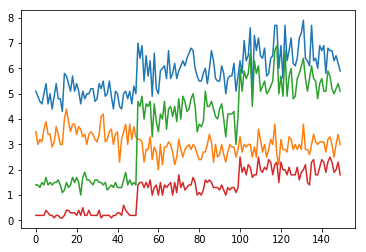

In [4]:
plt.plot(X)

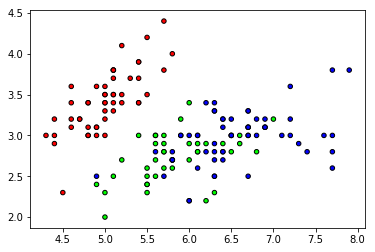

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)

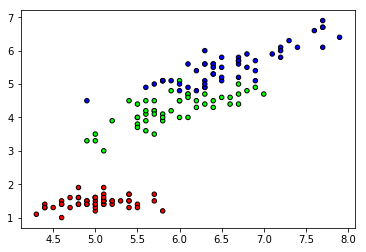

In [6]:
plt.figure()
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=cmap, edgecolor='k', s=20)

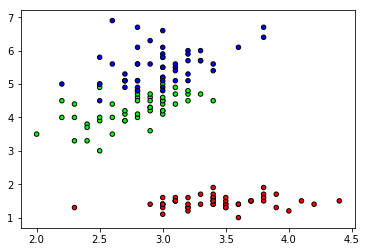

In [7]:
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cmap, edgecolor='k', s=20)

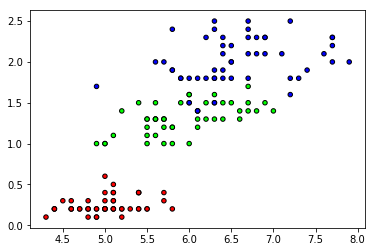

In [8]:
plt.figure()
plt.scatter(X[:, 0], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)

Step 5: Writing the Algorithm

In [9]:
def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x): #(Helper function)
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

Step 6: Testing on our example dataset

In [11]:
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions==y_test)/len(y_test)
acc

1.0

Step 7: Confusion Matrix and F1 Score:

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [13]:
confusion_matrix(y_test, predictions)

array([[ 9,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  8]], dtype=int64)

In [15]:
accuracy_score(y_test, predictions)

1.0